In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/andrew/Documents/Data Analyst Course/Data Immersion/Achievement 6/UK HPI Project/'

In [4]:
# Import the UK_HPI data

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'UK_HPI_CLEANED_1995.csv'))

In [5]:
df.head()

,Date,RegionName,AveragePrice,Index,1m%Change,12m%Change,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,...,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,Official Interest Rate
0,1/1/1995,Adur,54516.42545,21.836620,0.0,0.0,79.0,85482.01252,22.699081,0.0,...,22.378461,0.0,0.0,11.0,54372.37389,21.788639,0.0,0.0,68.0,6.13
1,1/1/1995,Allerdale,44464.03724,32.815689,0.0,0.0,70.0,67547.91981,34.139554,0.0,...,33.876423,0.0,0.0,9.0,43138.66035,32.908903,0.0,0.0,61.0,6.13
2,1/1/1995,Amber Valley,45424.80814,31.551992,0.0,0.0,114.0,66983.19796,32.574116,0.0,...,31.262341,0.0,0.0,16.0,44721.87801,31.570205,0.0,0.0,98.0,6.13
3,1/1/1995,Arun,59473.60257,25.259505,0.0,0.0,222.0,95785.74537,25.677194,0.0,...,24.467387,0.0,0.0,21.0,58827.71158,25.301688,0.0,0.0,201.0,6.13
4,1/1/1995,Ashfield,38911.87777,33.500470,0.0,0.0,97.0,56968.65464,35.040323,0.0,...,32.748969,0.0,0.0,23.0,38664.77907,34.044514,0.0,0.0,74.0,6.13


In [8]:
# Set the "Date" column as the index

from datetime import datetime

df['datetime'] = pd.to_datetime(df['Date']) # Create a datetime column from "Date.""
df = df.set_index('datetime') # Set the datetime as the index of the dataframe.
df.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df.head()

,RegionName,AveragePrice,Index,1m%Change,12m%Change,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,Detached12m%Change,...,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,Official Interest Rate
datetime,,,,,,,,,,,,,,,,,,,,,
1995-01-01,Adur,54516.42545,21.836620,0.0,0.0,79.0,85482.01252,22.699081,0.0,0.0,...,22.378461,0.0,0.0,11.0,54372.37389,21.788639,0.0,0.0,68.0,6.13
1995-01-01,Allerdale,44464.03724,32.815689,0.0,0.0,70.0,67547.91981,34.139554,0.0,0.0,...,33.876423,0.0,0.0,9.0,43138.66035,32.908903,0.0,0.0,61.0,6.13
1995-01-01,Amber Valley,45424.80814,31.551992,0.0,0.0,114.0,66983.19796,32.574116,0.0,0.0,...,31.262341,0.0,0.0,16.0,44721.87801,31.570205,0.0,0.0,98.0,6.13
1995-01-01,Arun,59473.60257,25.259505,0.0,0.0,222.0,95785.74537,25.677194,0.0,0.0,...,24.467387,0.0,0.0,21.0,58827.71158,25.301688,0.0,0.0,201.0,6.13
1995-01-01,Ashfield,38911.87777,33.500470,0.0,0.0,97.0,56968.65464,35.040323,0.0,0.0,...,32.748969,0.0,0.0,23.0,38664.77907,34.044514,0.0,0.0,74.0,6.13


In [9]:
# Drop columns not required for time series analysis
data_sub = df.drop(columns = ['1m%Change', '12m%Change', 'Detached1m%Change', 'Detached12m%Change', 'SemiDetached1m%Change', 'SemiDetached12m%Change', 'Terraced1m%Change', 'Terraced12m%Change', 'Flat1m%Change', 'Flat12m%Change', 'Cash1m%Change', 'Cash12m%Change', 'Mortgage1m%Change', 'Mortgage12m%Change', 'FTB1m%Change', 'FTB12m%Change', 'FOO1m%Change', 'FOO12m%Change', 'New1m%Change' , 'New12m%Change', 'Old1m%Change', 'Old12m%Change'])

In [10]:
data_sub.head()

,RegionName,AveragePrice,Index,SalesVolume,DetachedPrice,DetachedIndex,SemiDetachedPrice,SemiDetachedIndex,TerracedPrice,TerracedIndex,...,FTBIndex,FOOPrice,FOOIndex,NewPrice,NewIndex,NewSalesVolume,OldPrice,OldIndex,OldSalesVolume,Official Interest Rate
datetime,,,,,,,,,,,,,,,,,,,,,
1995-01-01,Adur,54516.42545,21.836620,79.0,85482.01252,22.699081,59598.67451,21.526612,48955.96381,20.454703,...,0.0,0.0,0.0,59255.49943,22.378461,11.0,54372.37389,21.788639,68.0,6.13
1995-01-01,Allerdale,44464.03724,32.815689,70.0,67547.91981,34.139554,42776.09928,32.499311,35513.54992,31.944308,...,0.0,0.0,0.0,60041.84226,33.876423,9.0,43138.66035,32.908903,61.0,6.13
1995-01-01,Amber Valley,45424.80814,31.551992,114.0,66983.19796,32.574116,40407.89905,31.274357,33439.34928,30.722479,...,0.0,0.0,0.0,63207.94539,31.262341,16.0,44721.87801,31.570205,98.0,6.13
1995-01-01,Arun,59473.60257,25.259505,222.0,95785.74537,25.677194,59760.25847,24.785972,47531.81490,23.787813,...,0.0,0.0,0.0,67718.47861,24.467387,21.0,58827.71158,25.301688,201.0,6.13
1995-01-01,Ashfield,38911.87777,33.500470,97.0,56968.65464,35.040323,35332.04192,33.051218,28723.84563,32.349616,...,0.0,0.0,0.0,48136.98634,32.748969,23.0,38664.77907,34.044514,74.0,6.13


In [11]:
data_sub = data_sub.drop(columns = ['Index', 'RegionName', 'Index', 'SalesVolume', 'DetachedPrice', 'DetachedIndex', 'SemiDetachedPrice', 'SemiDetachedIndex', 'TerracedPrice', 'FTBIndex', 'FOOPrice', 'FOOIndex', 'NewPrice', 'NewIndex', 'NewSalesVolume', 'OldPrice', 'OldIndex', 'OldSalesVolume', 'Official Interest Rate'])

In [12]:
data_sub.head()

,AveragePrice,TerracedIndex,FlatPrice,FlatIndex,CashPrice,CashIndex,CashSalesVolume,MortgagePrice,MortgageIndex,MortgageSalesVolume,FTBPrice
datetime,,,,,,,,,,,
1995-01-01,54516.42545,20.454703,38126.03274,23.790740,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-01-01,44464.03724,31.944308,32808.34708,35.863600,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-01-01,45424.80814,30.722479,30527.41852,33.568263,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-01-01,59473.60257,23.787813,39097.34709,27.485736,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-01-01,38911.87777,32.349616,25217.73531,37.376892,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data_sub = data_sub.drop(columns = ['TerracedIndex', 'FlatPrice', 'FlatIndex', 'CashPrice', 'CashIndex', 'CashSalesVolume', 'MortgagePrice', 'MortgageIndex', 'MortgageSalesVolume'])

In [14]:
data_sub.head()

,AveragePrice,FTBPrice
datetime,,
1995-01-01,54516.42545,0.0
1995-01-01,44464.03724,0.0
1995-01-01,45424.80814,0.0
1995-01-01,59473.60257,0.0
1995-01-01,38911.87777,0.0


In [15]:
data_sub = data_sub.drop(columns = ['FTBPrice'])

In [16]:
data_sub.head()

,AveragePrice
datetime,
1995-01-01,54516.42545
1995-01-01,44464.03724
1995-01-01,45424.80814
1995-01-01,59473.60257
1995-01-01,38911.87777


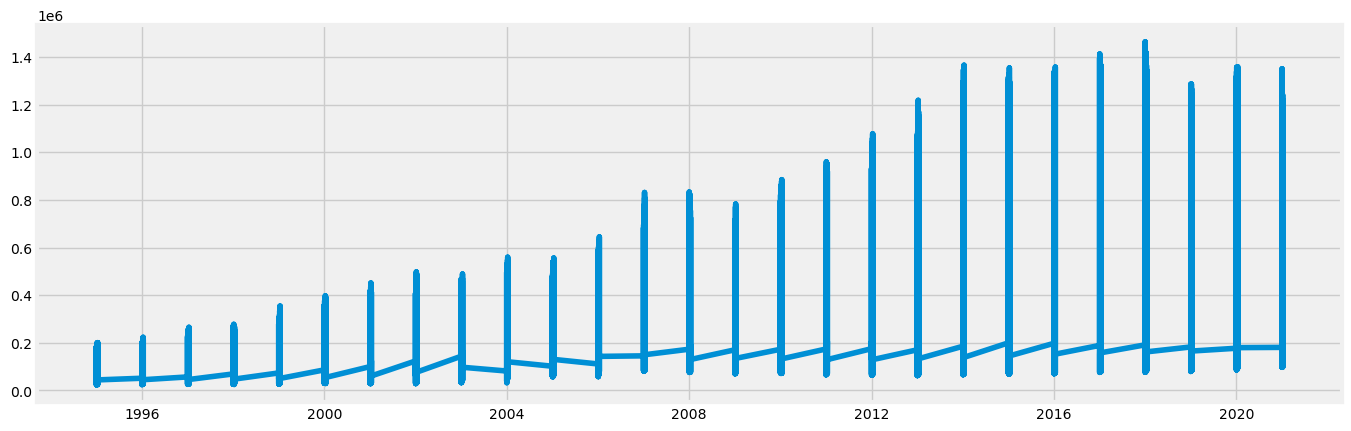

In [17]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [18]:
data_sub.sort_index(inplace= True)

In [19]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period = int(len(data_sub)/2))

In [20]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

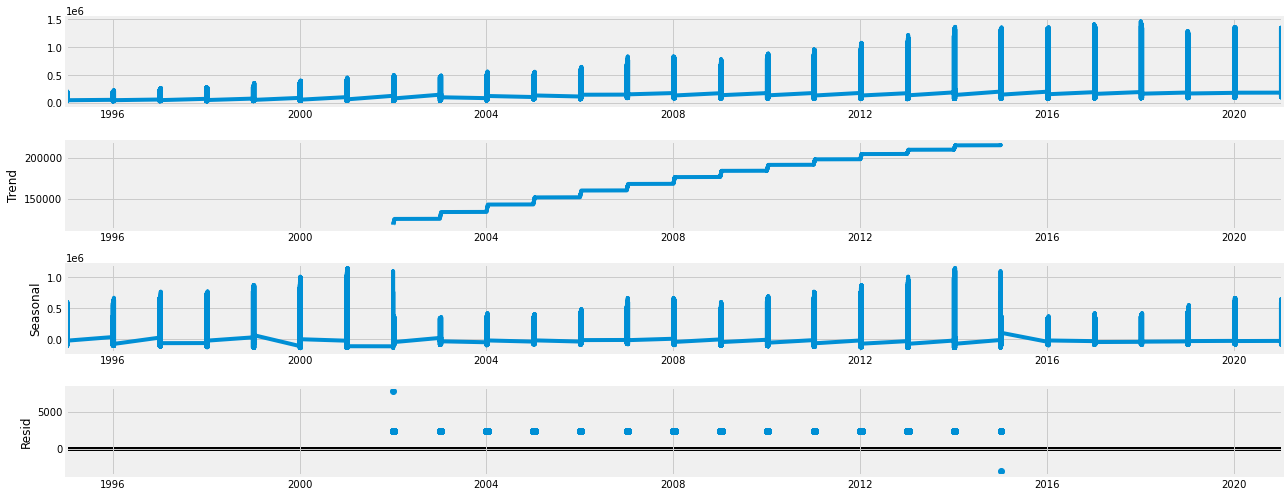

In [21]:
# Plot the separate components

decomposition.plot()
plt.show()

Looking at the decomposition, we can see on the Trend graph that indeed house prices are rising at a relatively steady rate, after 2012 this starts to increase a little slower however. It's much easier to identify this once all the noise has been removed.

In [22]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['AveragePrice'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.053906e+01
p-value                        8.745997e-19
Number of Lags Used            7.300000e+01
Number of Observations Used    1.308280e+05
Critical Value (1%)           -3.430400e+00
Critical Value (5%)           -2.861562e+00
Critical Value (10%)          -2.566782e+00
dtype: float64


The p-value is significantly less than 0.05, from this we could say that the test is significant. The test statistic however is larger than the critical value number, so we'll need to do some autocorrelations as we're unable to disprove the null hypothesis. 

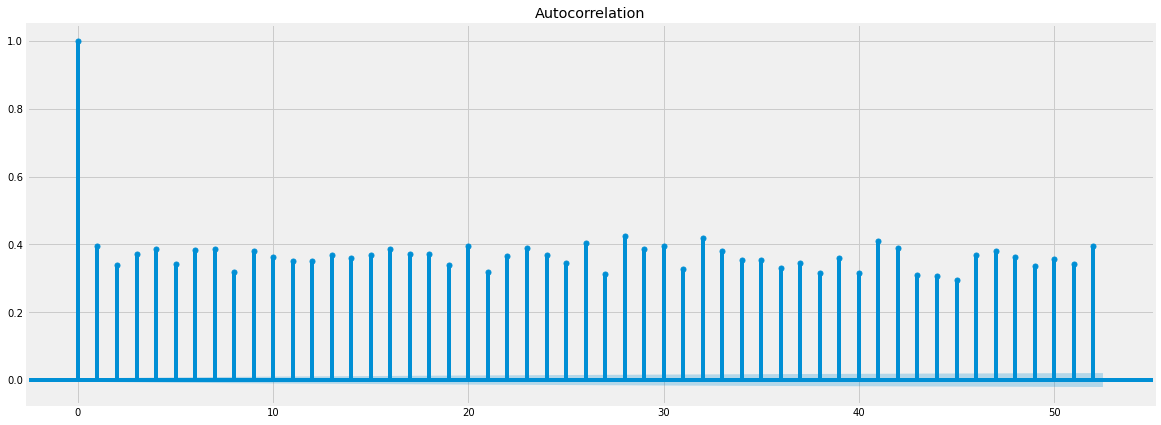

In [23]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

In [24]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [25]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [26]:
data_diff.head()

,AveragePrice
datetime,
1995-01-01,-10052.38821
1995-01-01,960.77090
1995-01-01,14048.79443
1995-01-01,-20561.72480
1995-01-01,22427.07605


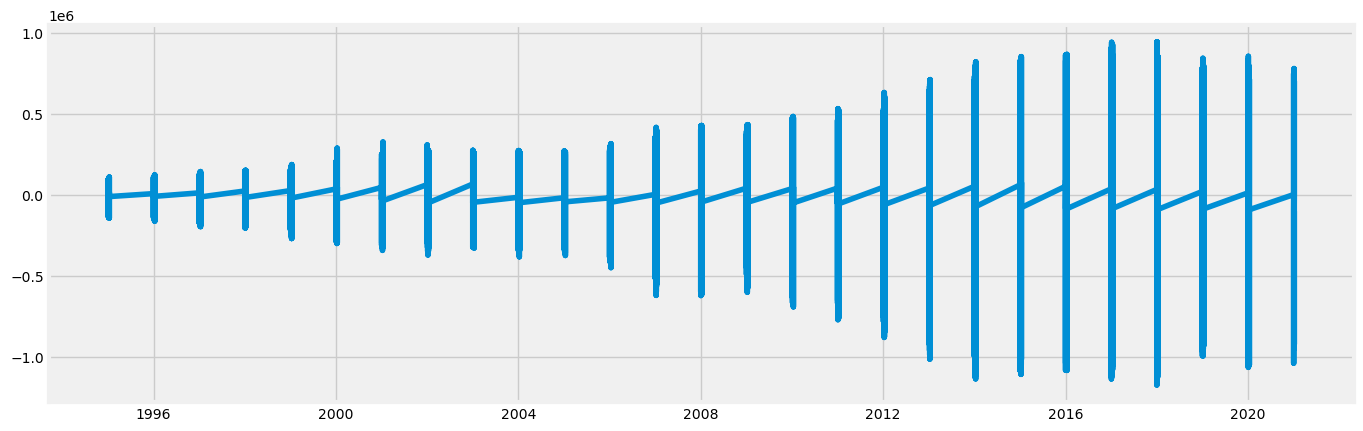

In [27]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [28]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                    -58.443321
p-value                             0.000000
Number of Lags Used                72.000000
Number of Observations Used    130828.000000
Critical Value (1%)                -3.430400
Critical Value (5%)                -2.861562
Critical Value (10%)               -2.566782
dtype: float64


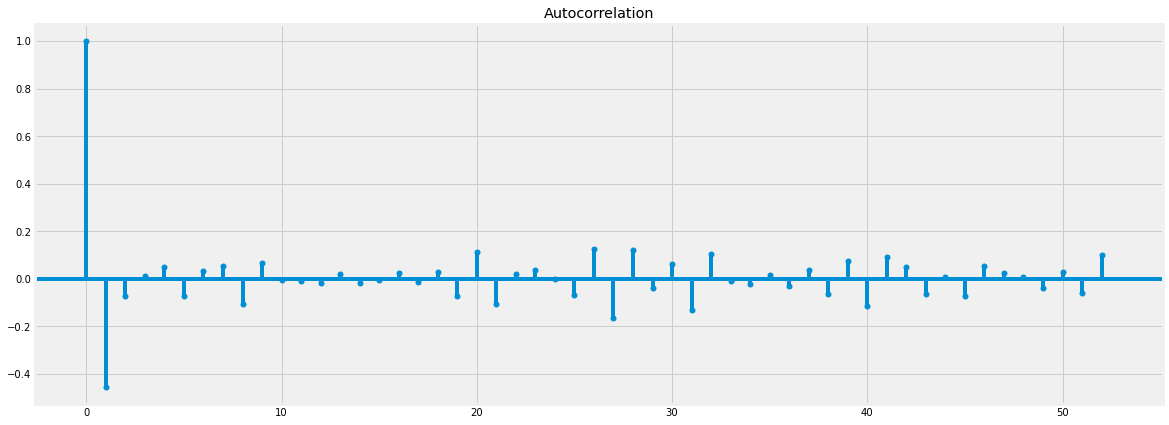

In [29]:
plot_acf(data_diff)
plt.show()

After doing the autocorrelation, we can now see that the test statistic (-58.4433) is significantly smaller than the critical value of 5% (-2.8615) so we can now reject the null hypothesis and the time series is now considered stationary.